In [1]:
import pandas as pd
import plotly.graph_objects as go
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Datasets/spongebuddy58_01_18_21.csv', parse_dates=[3])

In [3]:
df.head()

,Artist,Album,Song,Date
0,Cotton Jones,Paranoid Cocoon,I Am The Changer,NaT
1,The Frightnrs,Daptone Records Singles Collection: Volume 5,I'd Rather Go Blind,2022-01-19 22:25:00
2,Aldous Harding,Designer,The Barrel,2022-01-19 22:02:00
3,Dream Easy Collective,Autumn's End,Ultimately,2022-01-19 21:59:00
4,Mandolin Orange,Such Jubilee,Old Ties and Companions,2022-01-19 21:55:00


In [4]:
scrobbles_per_date = df.groupby(df["Date"].dt.date, as_index=True, dropna=True).count()[['Song']]
scrobbles_per_date = scrobbles_per_date.reset_index()
scrobbles_per_date.rename(columns={'Song': 'Scrobbles'}, inplace=True)
scrobbles_per_date['Date'] = pd.to_datetime(scrobbles_per_date['Date'])

In [7]:
scrobbles_per_date.dtypes

Date         datetime64[ns]
Scrobbles             int64
dtype: object

In [5]:
scrobbles_per_date['MA5'] = scrobbles_per_date.Scrobbles.rolling(5).mean()
scrobbles_per_date['MA20'] = scrobbles_per_date.Scrobbles.rolling(20).mean()

In [9]:
# plot the candlesticks
fig = go.Figure(data=[go.Scatter(x=scrobbles_per_date.Date,
                                     y=scrobbles_per_date.Scrobbles), 
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA5, line=dict(color='orange', width=1)),
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA20, line=dict(color='green', width=1))])

In [10]:
fig.show()

I wasn't alive in 1970... let's filter that out

In [6]:
scrobbles_per_date = scrobbles_per_date[scrobbles_per_date['Date'].dt.year > 2010] 

In [12]:
df.dtypes

Artist            object
Album             object
Song              object
Date      datetime64[ns]
dtype: object

In [13]:
# plot the candlesticks
fig = go.Figure(data=[go.Scatter(x=scrobbles_per_date.Date,
                                     y=scrobbles_per_date.Scrobbles), 
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA5, line=dict(color='orange', width=1)),
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA20, line=dict(color='green', width=1))])

In [14]:
fig.show()

Looks like I took a haitus from using LastFM to record my listening habits. Let's start our analysis from October 2017

In [7]:
scrobbles_per_date = scrobbles_per_date[scrobbles_per_date['Date'].dt.date >= pd.to_datetime("October 2017")] 

C:\Users\lucag\anaconda3\envs\DankFM\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [16]:
# plot the candlesticks
fig = go.Figure(data=[go.Scatter(x=scrobbles_per_date.Date,
                                     y=scrobbles_per_date.Scrobbles), 
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA5, line=dict(color='orange', width=1)),
                      go.Scatter(x=scrobbles_per_date.Date, y=scrobbles_per_date.MA20, line=dict(color='green', width=1))])

In [17]:
fig.show()

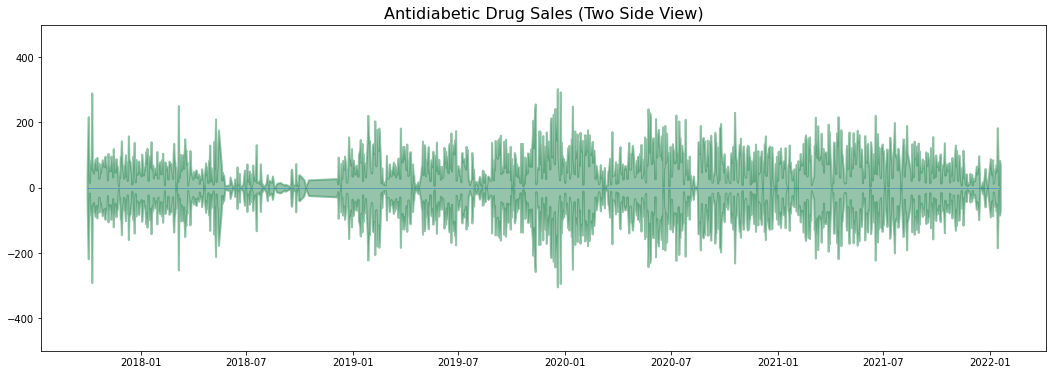

In [18]:
x = scrobbles_per_date['Date']
y = scrobbles_per_date['Scrobbles']

plt.figure(figsize=(18,6))
plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-500, 500)
plt.title('Antidiabetic Drug Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(scrobbles_per_date['Date'].values), xmax=np.max(scrobbles_per_date['Date'].values), linewidth=.5)
plt.show()

In [23]:
scrobbles_per_date.dtypes

Date         datetime64[ns]
Scrobbles             int64
MA5                 float64
MA20                float64
year                  int64
month                object
dtype: object

In [33]:
type(scrobbles_per_date)

pandas.core.frame.DataFrame

In [8]:
scrobbles_per_date['year'] = [d.year for d in scrobbles_per_date.Date]
scrobbles_per_date['month'] = [d.strftime('%b') for d in scrobbles_per_date.Date]
scrobbles_per_monthyear=scrobbles_per_date.groupby([(scrobbles_per_date.Date.dt.year),(scrobbles_per_date.Date.dt.month)])['Scrobbles'].sum()

In [9]:
scrobbles_per_monthyear = scrobbles_per_date[['Date', 'Scrobbles']]
scrobbles_per_monthyear['Year'] = [d.year for d in scrobbles_per_monthyear.Date]
scrobbles_per_monthyear['Month'] = [d.month for d in scrobbles_per_monthyear.Date]

C:\Users\lucag\AppData\Local\Temp\ipykernel_20100\3299106548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrobbles_per_monthyear['Year'] = [d.year for d in scrobbles_per_monthyear.Date]
C:\Users\lucag\AppData\Local\Temp\ipykernel_20100\3299106548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrobbles_per_monthyear['Month'] = [d.month for d in scrobbles_per_monthyear.Date]


In [10]:
scrobbles_per_monthyear=scrobbles_per_date.groupby([(scrobbles_per_monthyear.Year),(scrobbles_per_monthyear.Month)])['Scrobbles'].sum().reset_index()

0 2017
1 2018
2 2019
3 2020
4 2021
5 2022


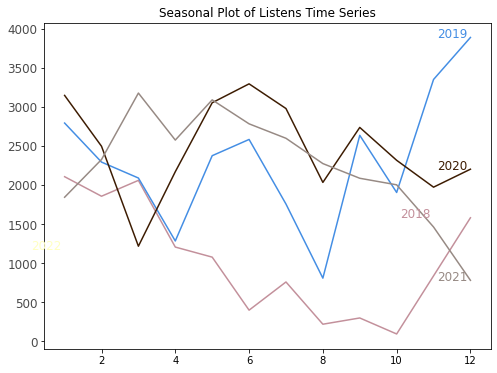

In [12]:
scrobbles_per_date_years = scrobbles_per_monthyear['Year'].unique()

# Prep Colors
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(scrobbles_per_date_years), replace=False)

# Draw Plot
plt.figure(figsize=(8,6))
for i, y in enumerate(scrobbles_per_date_years):
    print(i,y)
    if i > 0: 
        plt.plot(scrobbles_per_monthyear.loc[scrobbles_per_monthyear.Year==y, :]['Month'], scrobbles_per_monthyear.loc[scrobbles_per_monthyear.Year==y, :]['Scrobbles'], color=mycolors[i], label=y)       
        # plt.plot(data=scrobbles_per_date.loc[scrobbles_per_date.year==y, :], color=mycolors[i], label=y)
        plt.text(scrobbles_per_monthyear.loc[scrobbles_per_monthyear.Year==y, :].shape[0]-.9, scrobbles_per_monthyear.loc[scrobbles_per_monthyear.Year==y, 'Scrobbles'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 500), ylabel='$Listens$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Listens Time Series")
plt.show()

In [18]:
scrobbles_per_monthyear.head()

,Year,Month,Scrobbles
0,2017,10,2297
1,2017,11,1984
2,2017,12,1965
3,2018,1,2105
4,2018,2,1855


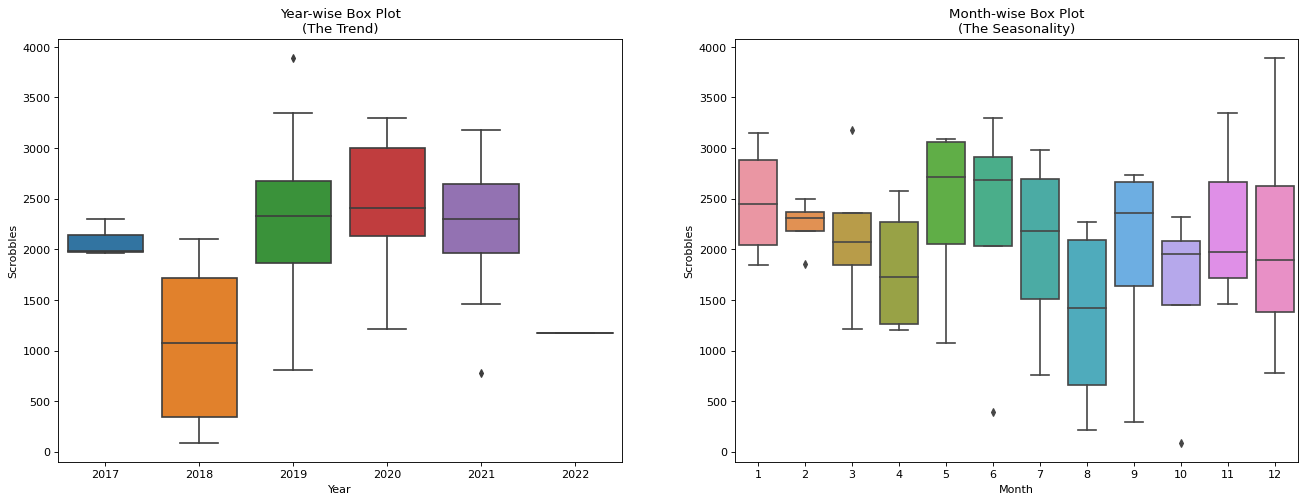

In [27]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Scrobbles', data=scrobbles_per_monthyear, ax=axes[0])
sns.boxplot(x='Month', y='Scrobbles', data=scrobbles_per_monthyear.loc[~scrobbles_per_monthyear.Year.isin([2017, 2022]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)'); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)')
plt.show()

In [25]:
scrobbles_per_monthyear.loc[scrobbles_per_monthyear['Month']==9]

,Year,Month,Scrobbles
11,2018,9,296
22,2019,9,2635
34,2020,9,2736
46,2021,9,2085


# Modeling

In [32]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(scrobbles_per_date["Scrobbles"])
print("p-value of Scrobbles: %.4f"%adf[1])

p-value of Scrobbles: 0.0000


Scrobbles has p-value 0.0000 which is less than than 0.05, null hypothesis that the series is random walk it is rejected (with 95% confidence level this is not a random walk). Hence the time series should be stationary which is what we expected having looked at the plot.

Stationarity is an important concept in time series analysis. ... Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

In [41]:
import statsmodels.api as sm

In [60]:
scrobble_model = sm.tsa.arima.ARIMA(scrobbles_per_date["Scrobbles"].values, order=(1,0,0))
scrobble_result = scrobble_model.fit()

In [61]:
print(scrobble_result.summary())
print("μ=%.3f ϕ=%.3f"%(scrobble_result.params[0],scrobble_result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1373
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7193.509
Date:                Mon, 21 Feb 2022   AIC                          14393.018
Time:                        20:16:23   BIC                          14408.692
Sample:                             0   HQIC                         14398.883
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.2986      2.350     32.046      0.000      70.693      79.904
ar.L1          0.3857      0.023     17.035      0.000       0.341       0.430
sigma2      2081.7967     68.617     30.339      0.0

In [74]:
scrobble_preds = scrobble_result.predict(start=100)

In [86]:
# plot the candlesticks
fig = go.Figure(data=[go.Scatter(x=scrobbles_per_date.Date[100:],
                                     y=scrobbles_per_date['Scrobbles'][100:], name="True Value"), 
                      go.Scatter(x=scrobbles_per_date.Date[100:], y=scrobble_preds, line=dict(color='orange', width=1), name="Pred Value")])

In [87]:
fig.show()

It's doing something but not so great... let's try to find a better order of our ARIMA process

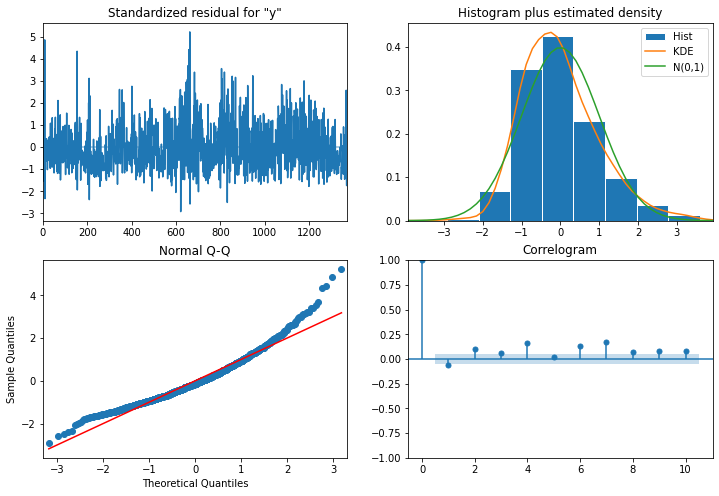

In [85]:
scrobble_result.plot_diagnostics(figsize=(12,8));

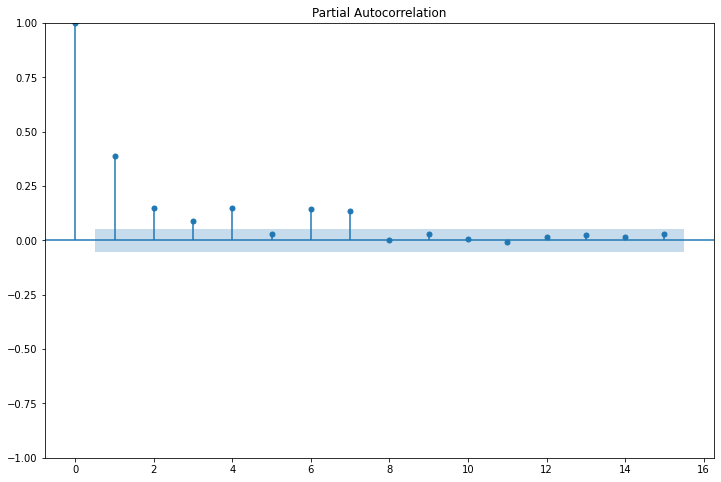

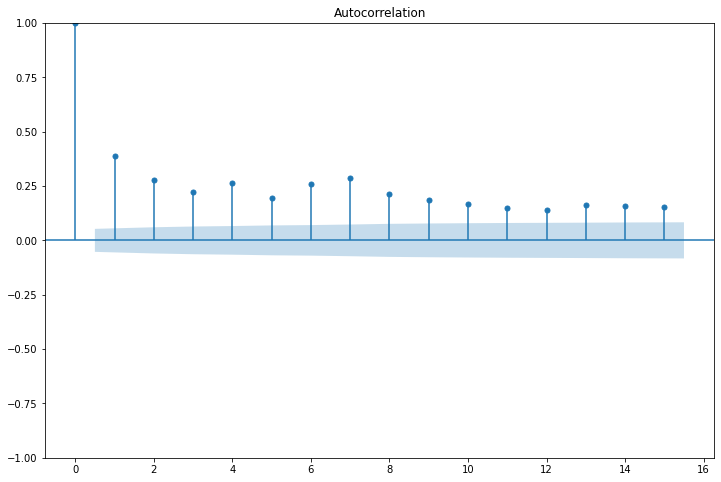

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    plot_pacf(scrobbles_per_date["Scrobbles"], alpha=.05,lags=15, method='ywm');
    plot_acf(scrobbles_per_date["Scrobbles"], alpha=.05,lags=15);

Looks like we may be dealing with an AR(7) process in that the current prediction depends on the last 7 inputs (which makes sense to capture weekly behavior). The Autocorrelation tails off thus indicating that there is no moving average component. 

Now, we consider all the AR model up to order 8 and for each one we are going to fit the model and track the value of the Bayesian Information Criterion and select the model that minimizes it.

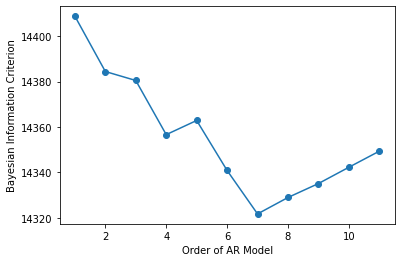

In [94]:
max_model_order = 12
BIC = np.zeros(max_model_order)
AIC = np.zeros(max_model_order)
for ar_order in range(max_model_order):
    model = sm.tsa.arima.ARIMA(scrobbles_per_date["Scrobbles"].values, order=(ar_order,0,0))
    result = model.fit()
    
    BIC[ar_order] = result.bic
    AIC[ar_order] = result.aic
    
plt.plot(range(1,max_model_order), BIC[1:max_model_order], marker='o')
plt.xlabel('Order of AR Model');
plt.ylabel('Bayesian Information Criterion');
plt.show()

As we expected 7 is the best choice for the AR order

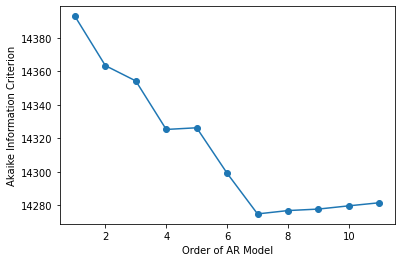

In [95]:
plt.plot(range(1,max_model_order), AIC[1:max_model_order], marker='o')
plt.xlabel('Order of AR Model');
plt.ylabel('Akaike Information Criterion');
plt.show()

AIC says the same thing

Let's make damn sure that there is no MA component

In [ ]:
p = []
q = []
bic = []
aic = []

for ar_order in range(9):
    for ma_order in range(4):
        model = sm.tsa.arima.ARIMA(scrobbles_per_date["Scrobbles"].values, order=(ar_order,0,ma_order))
        result = model.fit()
        
        p.append(ar_order)
        q.append(ma_order)
        bic.append(result.bic)
        aic.append(result.aic)
        
gridsearch = pd.DataFrame({'AR(p)':p,'MA(q)':q,'AIC':aic,'BIC':bic})

In [97]:
gridsearch

,AR(p),MA(q),AIC,BIC
0,0,0,14612.284761,14622.734268
1,0,1,14454.147736,14469.821996
2,0,2,14403.381750,14424.280764
3,0,3,14394.382337,14420.506104
4,1,0,14393.017931,14408.692191
5,1,1,14311.981249,14332.880263
6,1,2,14296.133417,14322.257184
7,1,3,14296.820847,14328.169367
8,2,0,14363.486503,14384.385516
9,2,1,14295.461448,14321.585215


In [98]:
gridsearch.sort_values(by='AIC',ascending=True).head()

,AR(p),MA(q),AIC,BIC
28,7,0,14274.759171,14321.781952
29,7,1,14276.759159,14329.006693
32,8,0,14276.759171,14329.006705
34,8,2,14277.506548,14340.203589
30,7,2,14277.904157,14335.376444


Yup confirmed

In [99]:
scrobble_model = sm.tsa.arima.ARIMA(scrobbles_per_date["Scrobbles"].values, order=(7,0,0))
scrobble_result = scrobble_model.fit()

In [100]:
print(scrobble_result.summary())
print("μ=%.3f ϕ=%.3f"%(scrobble_result.params[0],scrobble_result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1373
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7128.380
Date:                Mon, 21 Feb 2022   AIC                          14274.759
Time:                        21:06:45   BIC                          14321.782
Sample:                             0   HQIC                         14292.354
                               - 1373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.3043      4.664     16.147      0.000      66.163      84.445
ar.L1          0.2723      0.024     11.389      0.000       0.225       0.319
ar.L2          0.0834      0.025      3.294      0.0

In [101]:
scrobble_preds = scrobble_result.predict(start=100)

In [102]:
# plot the candlesticks
fig = go.Figure(data=[go.Scatter(x=scrobbles_per_date.Date[100:],
                                     y=scrobbles_per_date['Scrobbles'][100:], name="True Value"), 
                      go.Scatter(x=scrobbles_per_date.Date[100:], y=scrobble_preds, line=dict(color='orange', width=1), name="Pred Value")])

In [103]:
fig.show()